# 📈 Netflix Stock Price Analysis & EDA (2002 - Present)

Welcome! This notebook explores historical Netflix (NFLX) stock price trends through comprehensive data analysis and visual storytelling. We'll uncover:

---

- **Data Overview**
- Columns: Date, Open, High, Low, Close, Adj Close, Volume
- Cleaning the initial header duplication row

---

 - **Data Cleaning**
- Removing the incorrect first row
- Converting date to datetime format
- Checking for nulls or anomalies

---

- **Price Trend Analysis**
- Line plotting of Adj Close price over time  
- Highlighting major trends (e.g., growth after streaming launch)

---

- **Moving Averages (50, 200 days)**
- Visualizing short vs long-term trends  
- Detecting potential buy/sell signals

---

- **Volatility Analysis**
- Calculating daily returns  
- Plotting rolling standard deviation  

---

- **Trading Volume Insights**
- Daily volume trends Analysis 
- Volume spikes linked to price events  

---

- **Price Distribution**
- Plotting Histogram of Adjusted Close prices  
- Plotting Boxplot to detect price outliers  

---

- **Correlation Analysis**
- Plotting Pairplot between price columns (Open, Close, High, Low)  

---

- **Conclusions & Insights**
- Summarizing key takeaways  
- Analyzing Market phases: stability, volatility, growth  






In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tsns = sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/netflix-stock-data-2025/NFLX_stocks.csv


## 1️⃣ Data Overview

In [47]:
df=pd.read_csv("/kaggle/input/netflix-stock-data-2025/NFLX_stocks.csv")
df.head()

,date,open,high,low,close,adj_close,volume
0,NaN,NFLX,NFLX,NFLX,NFLX,NFLX,NFLX
1,2002-05-23,1.1564290523529053,1.2428569793701172,1.1457140445709229,1.1964290142059326,1.1964290142059326,104790000
2,2002-05-24,1.214285969734192,1.225000023841858,1.1971429586410522,1.2100000381469727,1.2100000381469727,11104800
3,2002-05-28,1.2135709524154663,1.2321430444717407,1.157142996788025,1.157142996788025,1.157142996788025,6609400
4,2002-05-29,1.1642860174179077,1.1642860174179077,1.0857139825820923,1.1035710573196411,1.1035710573196411,6757800


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5803 entries, 0 to 5802
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5802 non-null   object
 1   open       5803 non-null   object
 2   high       5803 non-null   object
 3   low        5803 non-null   object
 4   close      5803 non-null   object
 5   adj_close  5803 non-null   object
 6   volume     5803 non-null   object
dtypes: object(7)
memory usage: 317.5+ KB


## 2️⃣ Data Cleaning

In [49]:
df = df[df['date'] != 'NaN']
df = df[df['date'] != 'date']

### Convert data types

In [50]:
df['date'] = pd.to_datetime(df['date'])
for col in ['open', 'high', 'low', 'close', 'adj_close', 'volume']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.sort_values('date').reset_index(drop=True)

### Check dataframe again

In [60]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5803 entries, 0 to 5802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            5802 non-null   datetime64[ns]
 1   open            5802 non-null   float64       
 2   high            5802 non-null   float64       
 3   low             5802 non-null   float64       
 4   close           5802 non-null   float64       
 5   adj_close       5802 non-null   float64       
 6   volume          5802 non-null   float64       
 7   ma_50           5753 non-null   float64       
 8   ma_200          5603 non-null   float64       
 9   daily_return    5802 non-null   float64       
 10  volatility_30d  5773 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 498.8 KB


,date,open,high,low,close,adj_close,volume,ma_50,ma_200,daily_return,volatility_30d
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000.0,NaN,NaN,NaN,NaN
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800.0,NaN,NaN,0.011343,NaN
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400.0,NaN,NaN,-0.043684,NaN
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800.0,NaN,NaN,-0.046297,NaN
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200.0,NaN,NaN,-0.029125,NaN


## 3️⃣ Price Trend Analysis

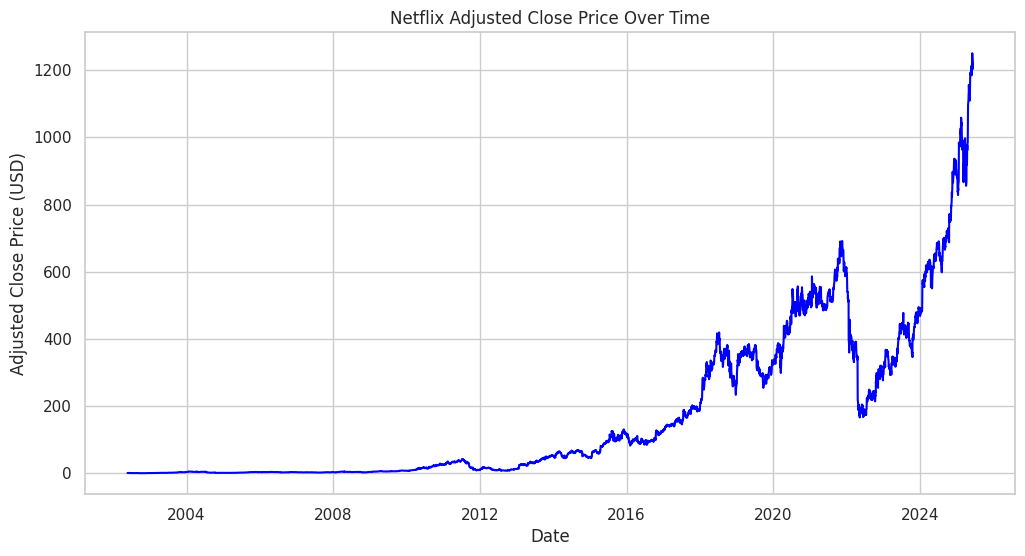

In [52]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['adj_close'], color='blue')
plt.title('Netflix Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.show()


## 4️⃣ Moving Averages (50, 200 days)

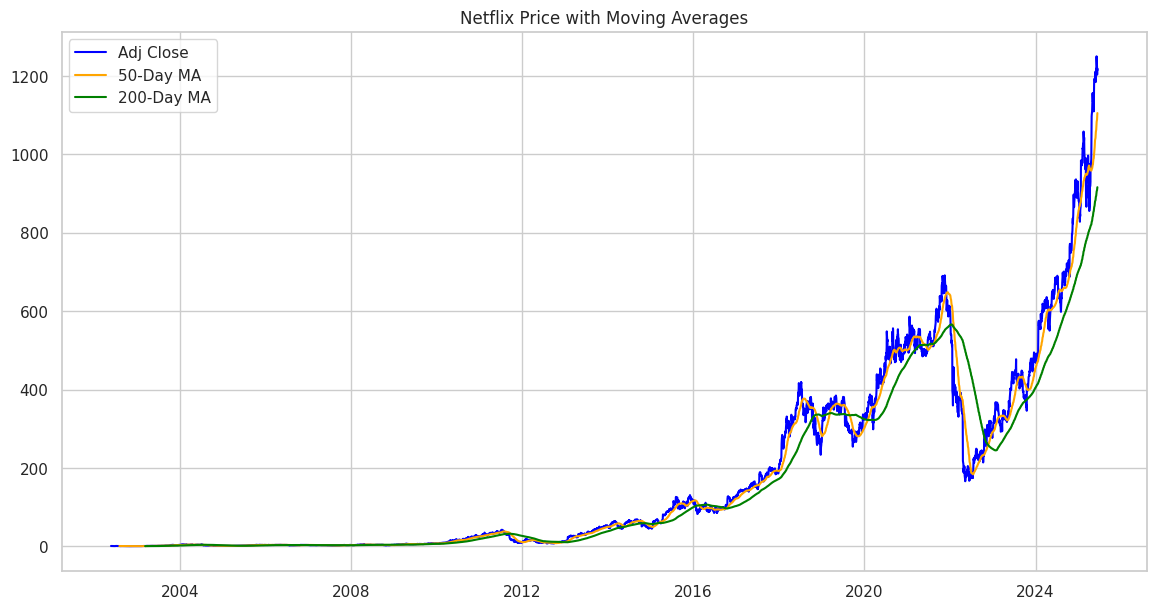

In [53]:
for window in [50, 200]:
    df[f'ma_{window}'] = df['adj_close'].rolling(window=window).mean()

plt.figure(figsize=(14,7))
plt.plot(df['date'], df['adj_close'], label='Adj Close', color='blue')
plt.plot(df['date'], df['ma_50'], label='50-Day MA', color='orange')
plt.plot(df['date'], df['ma_200'], label='200-Day MA', color='green')
plt.title('Netflix Price with Moving Averages')
plt.legend()
plt.show()

## 5️⃣ Volatility Analysis

### Daily Return

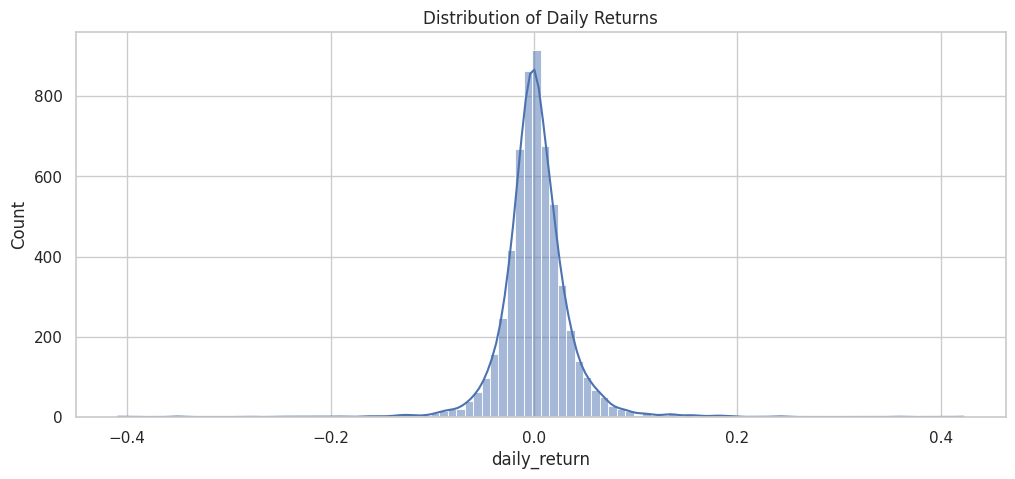

In [54]:
df['daily_return'] = df['adj_close'].pct_change()

plt.figure(figsize=(12,5))
sns.histplot(df['daily_return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

### Rolling volatility (30-day std dev)

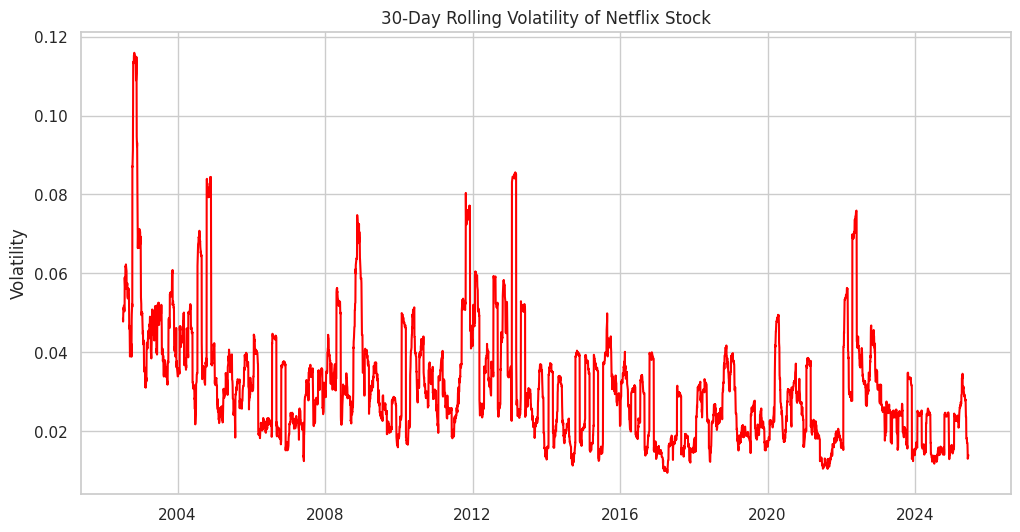

In [55]:
df['volatility_30d'] = df['daily_return'].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['volatility_30d'], color='red')
plt.title('30-Day Rolling Volatility of Netflix Stock')
plt.ylabel('Volatility')
plt.show()


## 6️⃣ Trading Volume Insights

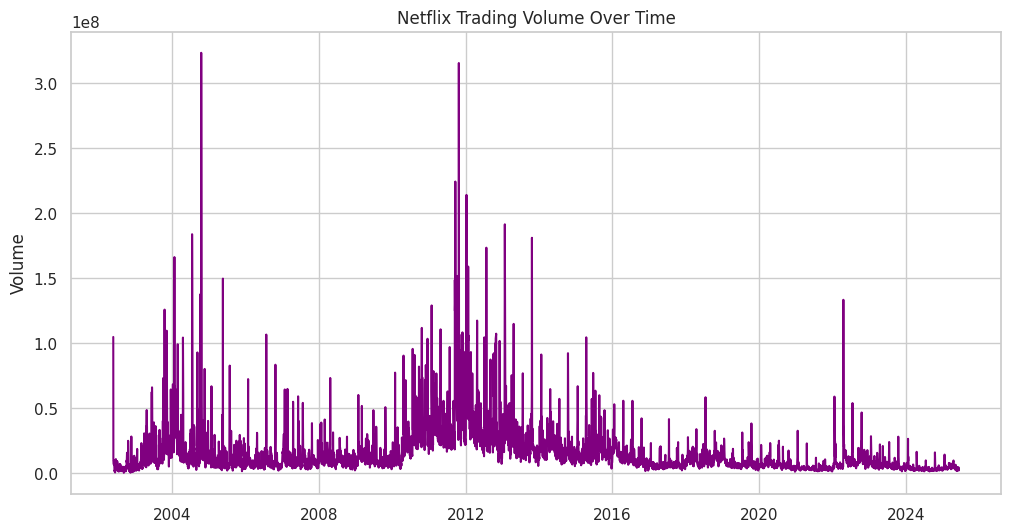

In [56]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['volume'], color='purple')
plt.title('Netflix Trading Volume Over Time')
plt.ylabel('Volume')
plt.show()

## 7️⃣ Price Distribution

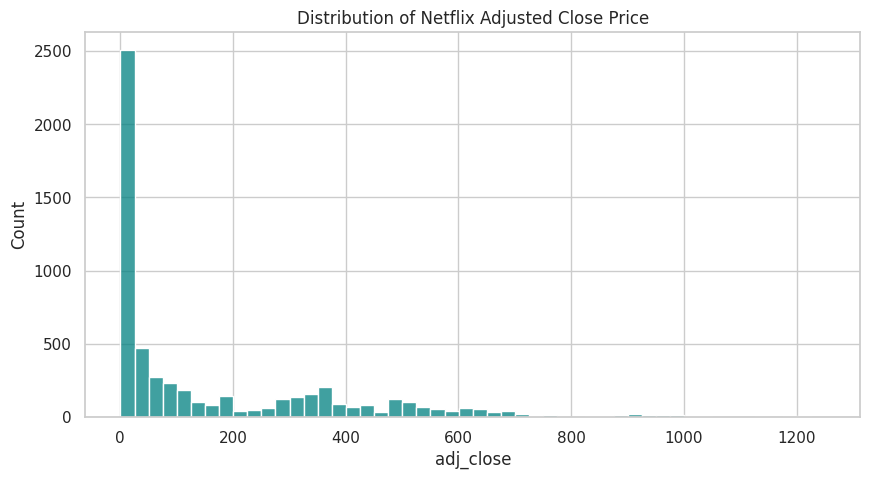

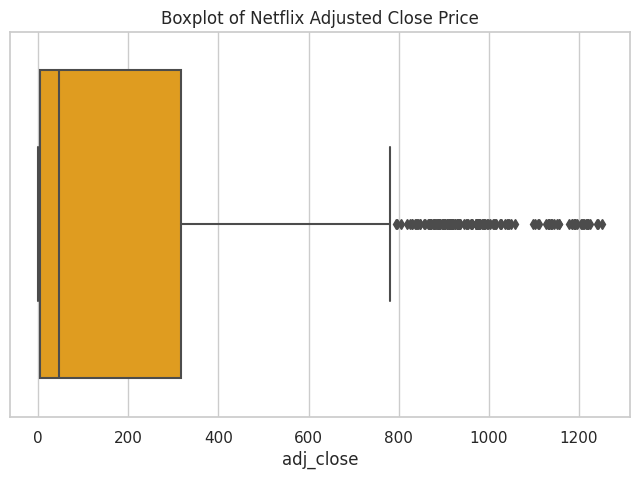

In [57]:
plt.figure(figsize=(10,5))
sns.histplot(df['adj_close'], bins=50, color='teal')
plt.title('Distribution of Netflix Adjusted Close Price')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df['adj_close'], color='orange')
plt.title('Boxplot of Netflix Adjusted Close Price')
plt.show()

## 8️⃣ Correlation Analysis

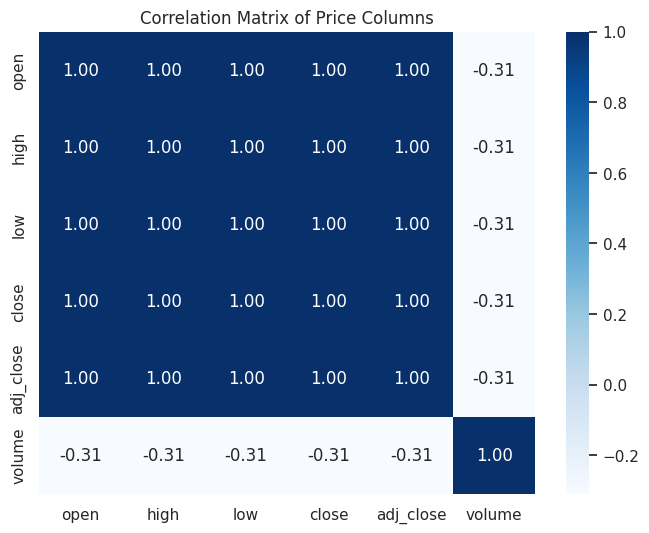

In [58]:
corr = df[['open', 'high', 'low', 'close', 'adj_close', 'volume']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Price Columns')
plt.show()

## 9️⃣ Conclusions & Insights

In [59]:
print("""
Key Insights:
- Netflix stock shows long-term growth with periods of volatility.
- Moving Averages indicate trends and potential trading signals.
- Trading volume spikes align with price movements.
- Daily returns distribution shows moderate volatility.
""")


Key Insights:
- Netflix stock shows long-term growth with periods of volatility.
- Moving Averages indicate trends and potential trading signals.
- Trading volume spikes align with price movements.
- Daily returns distribution shows moderate volatility.



# Thanks for exploring! Don't forget to upvote if you found this useful 😊